In [1]:
#Importing, Understanding, and Inspecting Data :

#Perform preliminary data inspection and report the findings as the structure of the data, missing values, duplicates, etc.

#Based on the findings from the previous question, remove duplicates (if any) and treat missing values using an appropriate strategy.

#Get a preliminary statistical summary of the data. Explore the measures of central tendencies and the spread of the data overall.
#Importing and reading dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import socket
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
warnings.filterwarnings("ignore")

In [2]:
health_df=pd.read_csv(r'C:\Users\pooja\Downloads\Project 3 HealthCare\healthdata.csv')
health_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
health_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
health_df.shape

(303, 14)

In [5]:
health_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
health_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
health_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
#Identify the data variables which might be categorical in nature.



health_df["sex"] = health_df["sex"].astype('category')
health_df["cp"] = health_df["cp"].astype('category')
health_df["fbs"] = health_df["fbs"].astype('category')
health_df["restecg"] = health_df["restecg"].astype('category')
health_df["exang"] = health_df["exang"].astype('category')
health_df["slope"] = health_df["slope"].astype('category')
health_df["ca"] = health_df["ca"].astype('category')
health_df["thal"] = health_df["thal"].astype('category')
health_df["target"] = health_df["target"].astype('category')
health_df.dtypes

age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
target      category
dtype: object

In [9]:
health_df.shape

(303, 14)

In [10]:
health_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
duplicate1 = health_df[health_df.duplicated()]
duplicate1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [12]:
df1=health_df.drop_duplicates(keep="first", inplace=True)
len(health_df)

302

<AxesSubplot:>

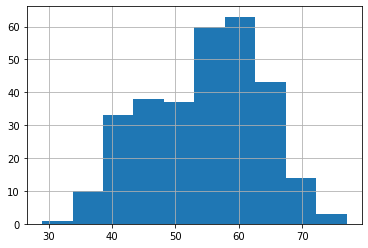

In [13]:
health_df.age.hist()


<AxesSubplot:>

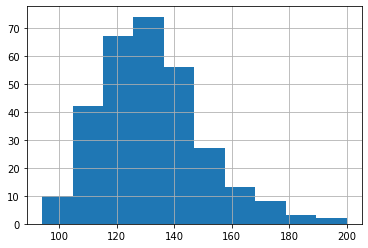

In [14]:
health_df.trestbps.hist()

<AxesSubplot:>

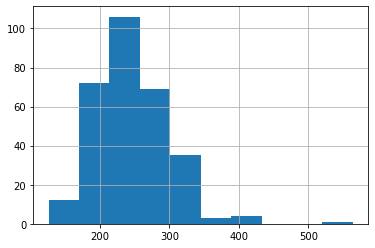

In [15]:
health_df.chol.hist()

<AxesSubplot:>

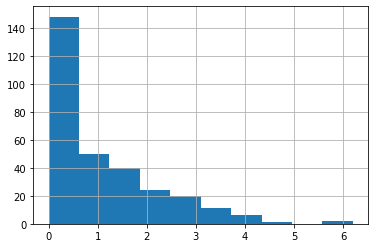

In [16]:
health_df.oldpeak.hist()

In [17]:
health_df.describe()

,age,trestbps,chol,thalach,oldpeak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,200.000000,564.000000,202.000000,6.200000


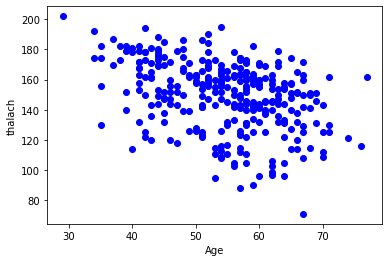

In [18]:
plt.scatter(x=health_df["age"],y=health_df["thalach"], c="blue")

plt.xlabel("Age")
plt.ylabel("thalach")
plt.show()


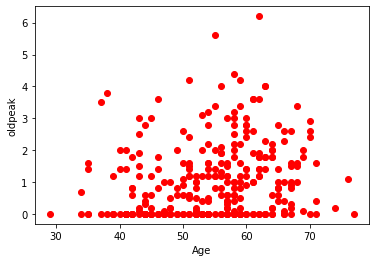

In [19]:
plt.scatter(x=health_df["age"],y=health_df["oldpeak"], c="red")
plt.xlabel("Age")
plt.ylabel("oldpeak")
plt.show()

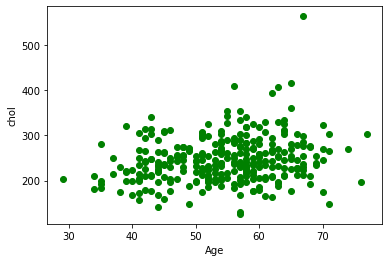

In [20]:
plt.scatter(x=health_df["age"],y=health_df["chol"], c="green")
plt.xlabel("Age")
plt.ylabel("chol")
plt.show()

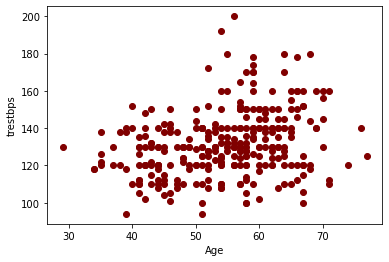

In [21]:
plt.scatter(x=health_df["age"],y=health_df["trestbps"], c="maroon")
plt.xlabel("Age")
plt.ylabel("trestbps")
plt.show()

In [22]:
hdf2=health_df.copy()

In [23]:
len(hdf2)

302

In [24]:
hdf2['SEX'] = np.where(hdf2['sex']==0, 'Female', 'Male')
hdf2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,SEX
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Male
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Male
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Female
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Male
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Female


In [25]:
hdf2.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,SEX
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,Female
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,Male
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,Male
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,Male
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0,Female


Text(0.5, 1.0, 'Gender v/s Target')

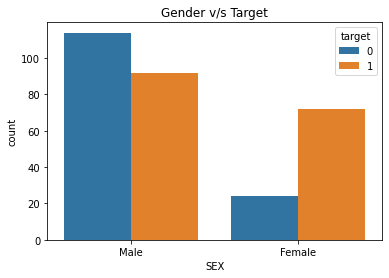

In [26]:
#Describe and explore these variables using appropriate tools. For example: count plot.
fig_dims = (6, 4)
fig, ax1 = plt.subplots(figsize=fig_dims)
ax = sns.countplot(data=hdf2, x='SEX', hue='target')

plt.title('Gender v/s Target')

Text(0.5, 1.0, 'Chest Pain v/s Sex')

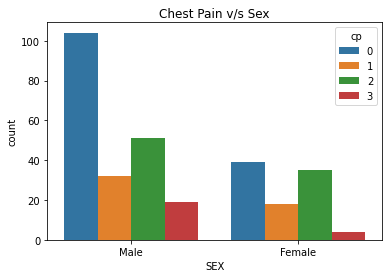

In [27]:
fig_dims = (6, 4)
fig, ax1 = plt.subplots(figsize=fig_dims)
ax = sns.countplot(x="SEX",data=hdf2,hue='cp')

plt.title('Chest Pain v/s Sex')

Text(0.5, 1.0, 'Chest Pain v/s Target')

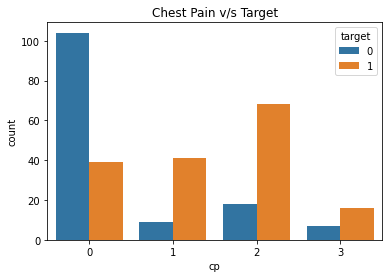

In [28]:
fig_dims = (6, 4)
fig, ax1 = plt.subplots(figsize=fig_dims)
ax = sns.countplot(x="cp",data=hdf2,hue='target')

plt.title('Chest Pain v/s Target')

Text(0.5, 1.0, 'Fasting Blood Sugar v/s Sex')

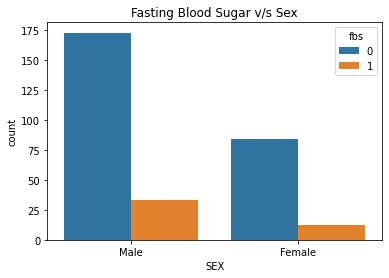

In [29]:
fig_dims = (6, 4)
fig, ax1 = plt.subplots(figsize=fig_dims)
ax = sns.countplot(x="SEX",data=hdf2,hue='fbs')

plt.title('Fasting Blood Sugar v/s Sex')

Text(0.5, 1.0, 'Fasting Blood Sugar v/s Target')

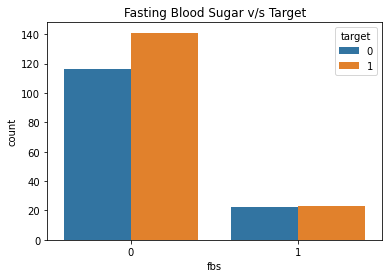

In [30]:
fig_dims = (6, 4)
fig, ax1 = plt.subplots(figsize=fig_dims)
ax = sns.countplot(x="fbs",data=hdf2,hue='target')

plt.title('Fasting Blood Sugar v/s Target')

Text(0.5, 1.0, 'Resting ECG v/s Target')

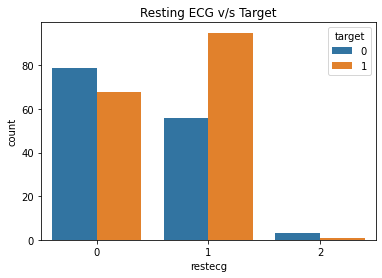

In [31]:
fig_dims=(6,4)
fig, ax1=plt.subplots(figsize=fig_dims)
ax=sns.countplot(x="restecg", data=hdf2, hue='target')
plt.title("Resting ECG v/s Target")

Text(0.5, 1.0, 'Resting ECG v/s Sex')

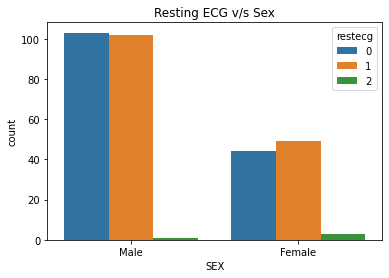

In [32]:
fig_dims=(6,4)
fig, ax1=plt.subplots(figsize=fig_dims)
ax=sns.countplot(x="SEX", data=hdf2, hue='restecg')
plt.title("Resting ECG v/s Sex")

Text(0.5, 1.0, 'Exercise induced angina v/s Target')

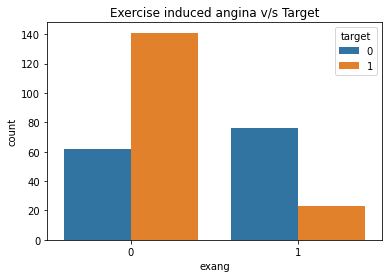

In [33]:
fig_dims=(6,4)
fig, ax1=plt.subplots(figsize=fig_dims)
ax=sns.countplot(x="exang", data=hdf2, hue='target')
plt.title("Exercise induced angina v/s Target")

Text(0.5, 1.0, 'Exercise induced angina v/s Sex')

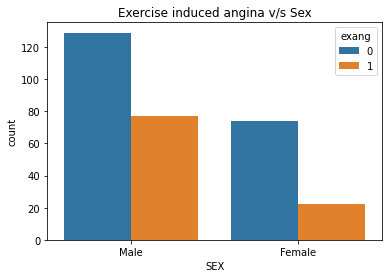

In [34]:
fig_dims=(6,4)
fig, ax1=plt.subplots(figsize=fig_dims)
ax=sns.countplot(x="SEX", data=hdf2, hue='exang')
plt.title("Exercise induced angina v/s Sex")

Text(0.5, 1.0, 'The slope of the peak exercise ST segment v/s Target')

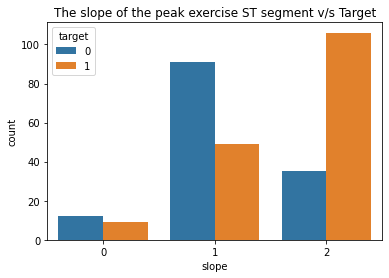

In [35]:
fig_dims=(6,4)
fig, ax1=plt.subplots(figsize=fig_dims)
ax=sns.countplot(data= hdf2, x="slope", hue="target")
plt.title("The slope of the peak exercise ST segment v/s Target")

Text(0.5, 1.0, 'The slope of the peak exercise ST segment v/s Sex')

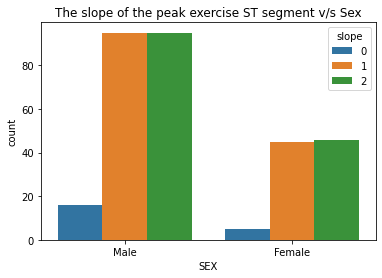

In [36]:
fig_dims=(6,4)
fig, ax1=plt.subplots(figsize=fig_dims)
ax=sns.countplot(data= hdf2, x="SEX", hue="slope")
plt.title("The slope of the peak exercise ST segment v/s Sex")

Text(0.5, 1.0, 'Number of major vessels colored by flurosopy v/s Target')

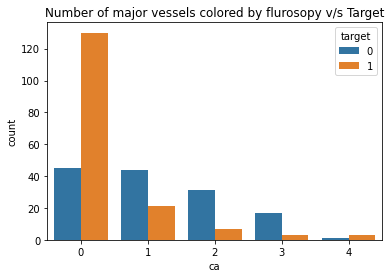

In [37]:
fig_dims=(6,4)
fig, ax1=plt.subplots(figsize=fig_dims)
ax=sns.countplot(data=hdf2, x="ca", hue="target")
plt.title("Number of major vessels colored by flurosopy v/s Target")

Text(0.5, 1.0, 'Number of major vessels colored by flurosopy v/s Sex')

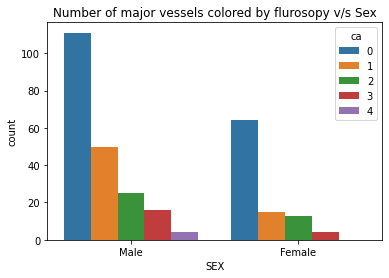

In [38]:
fig_dims=(6,4)
fig, ax1=plt.subplots(figsize=fig_dims)
ax=sns.countplot(data=hdf2, x="SEX", hue="ca")
plt.legend(loc='upper right', title='ca')
plt.title("Number of major vessels colored by flurosopy v/s Sex")

Text(0.5, 1.0, 'Number of major vessels colored by flurosopy v/s Sex')

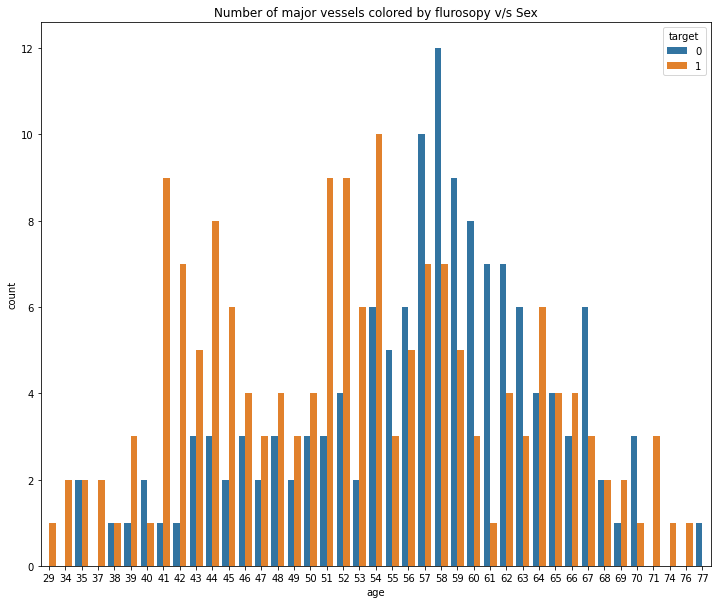

In [58]:
#Study the occurrence of CVD across different ages.
#Age range between 56 to 63 are the group where count of patients in category target 0 is higher than target 1
fig_dims=(12,10)
fig, ax1=plt.subplots(figsize=fig_dims)
ax=sns.countplot(data=hdf2, x="age", hue="target")
plt.legend(loc='upper right', title='target')
plt.title("Number of major vessels colored by flurosopy v/s Sex")

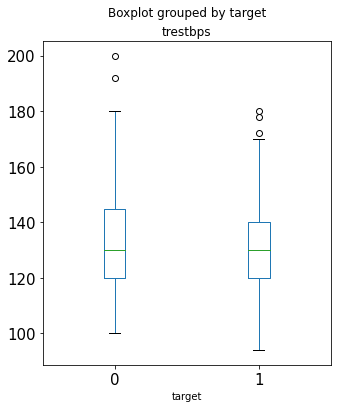

In [40]:
#Can we detect heart attack based on anomalies in resting blood pressure of the patient?
#We cant detect heart attack based on anomalies because most of the patients both in target 0 and 1 
#are having resting bps around 120 to 140's.


boxplot=hdf2.boxplot(column=['trestbps'], by='target', layout=(1,1),grid=False,fontsize=15,figsize=(5,6))

([<matplotlib.patches.Wedge at 0x275e3fabeb0>,
 [Text(-0.5955797151805878, 0.9248160913746094, 'Male'),
  Text(0.5955797151805882, -0.9248160913746093, 'Female')],
 [Text(-0.3248616628257751, 0.5044451407497869, '68.2'),
  Text(0.32486166282577533, -0.5044451407497869, '31.8')])

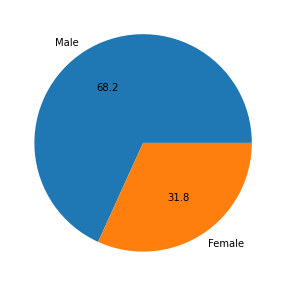

In [41]:
#Study the composition of overall patients w.r.t . gender.
#w.r.t gender female compose 31.8% and male compose 68.2%, which means male have chances of having CVD due to reason like stress or having alcohol etc.

plt.figure(figsize=(5,5))
plt.pie(hdf2['SEX'].value_counts(),autopct='%.1f',labels=['Male','Female'])


In [42]:
hdf2['SEX'].value_counts()

Male      206
Female     96
Name: SEX, dtype: int64

In [43]:
hdf2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,SEX
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Male
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Male
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Female
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Male
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Female


In [44]:
hdf2["sex"] = hdf2["sex"].astype('int64')
hdf2["cp"] = hdf2["cp"].astype('int64')
hdf2["fbs"] = hdf2["fbs"].astype('int64')
hdf2["restecg"] =hdf2["restecg"].astype('int64')
hdf2["exang"] = hdf2["exang"].astype('int64')
hdf2["slope"] = hdf2["slope"].astype('int64')
hdf2["ca"] = hdf2["ca"].astype('int64')
hdf2["thal"] = hdf2["thal"].astype('int64')
hdf2["target"] = hdf2["target"].astype('int64')
hdf2.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
SEX          object
dtype: object

In [45]:
#Describe the relationship between cholesterol levels and our target variable.
#What can be concluded about the relationship between peak exercising and occurrence of heart attack?
#Is thalassemia a major cause of CVD? How are the other factors determining the occurrence of CVD?
#We can see in the heat map that the impact of choloestrol and thalessamia is having very less impact on occurence of CVD
#while slope have a positive correlation with Occurence of CVD

hdf2.groupby('target')[['chol','slope','thal']].corr()

chol     slope      thal
target                                    
0      chol   1.000000  0.003418  0.071232
       slope  0.003418  1.000000  0.028485
       thal   0.071232  0.028485  1.000000
1      chol   1.000000  0.050164  0.080394
       slope  0.050164  1.000000  0.003771
       thal   0.080394  0.003771  1.000000

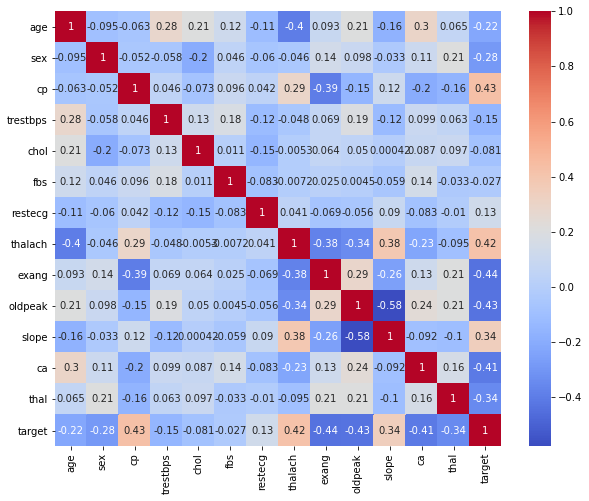

In [46]:

plt.figure(figsize = (10,8))
ax=sns.heatmap(hdf2.corr(),annot=True, cmap='coolwarm')

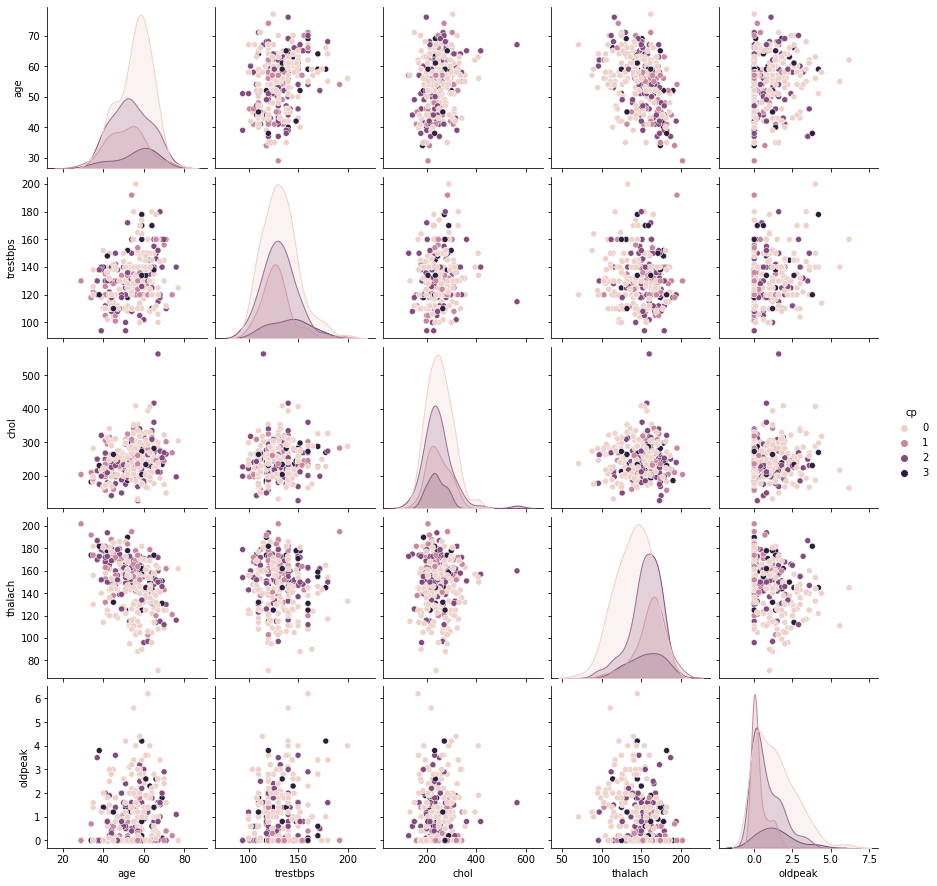

In [47]:
#Use a pair plot to understand the relationship between all the given variables.

sns.pairplot(hdf2,x_vars=['age','trestbps','chol','thalach','oldpeak'], 
             y_vars=['age','trestbps','chol','thalach','oldpeak'],hue='cp')

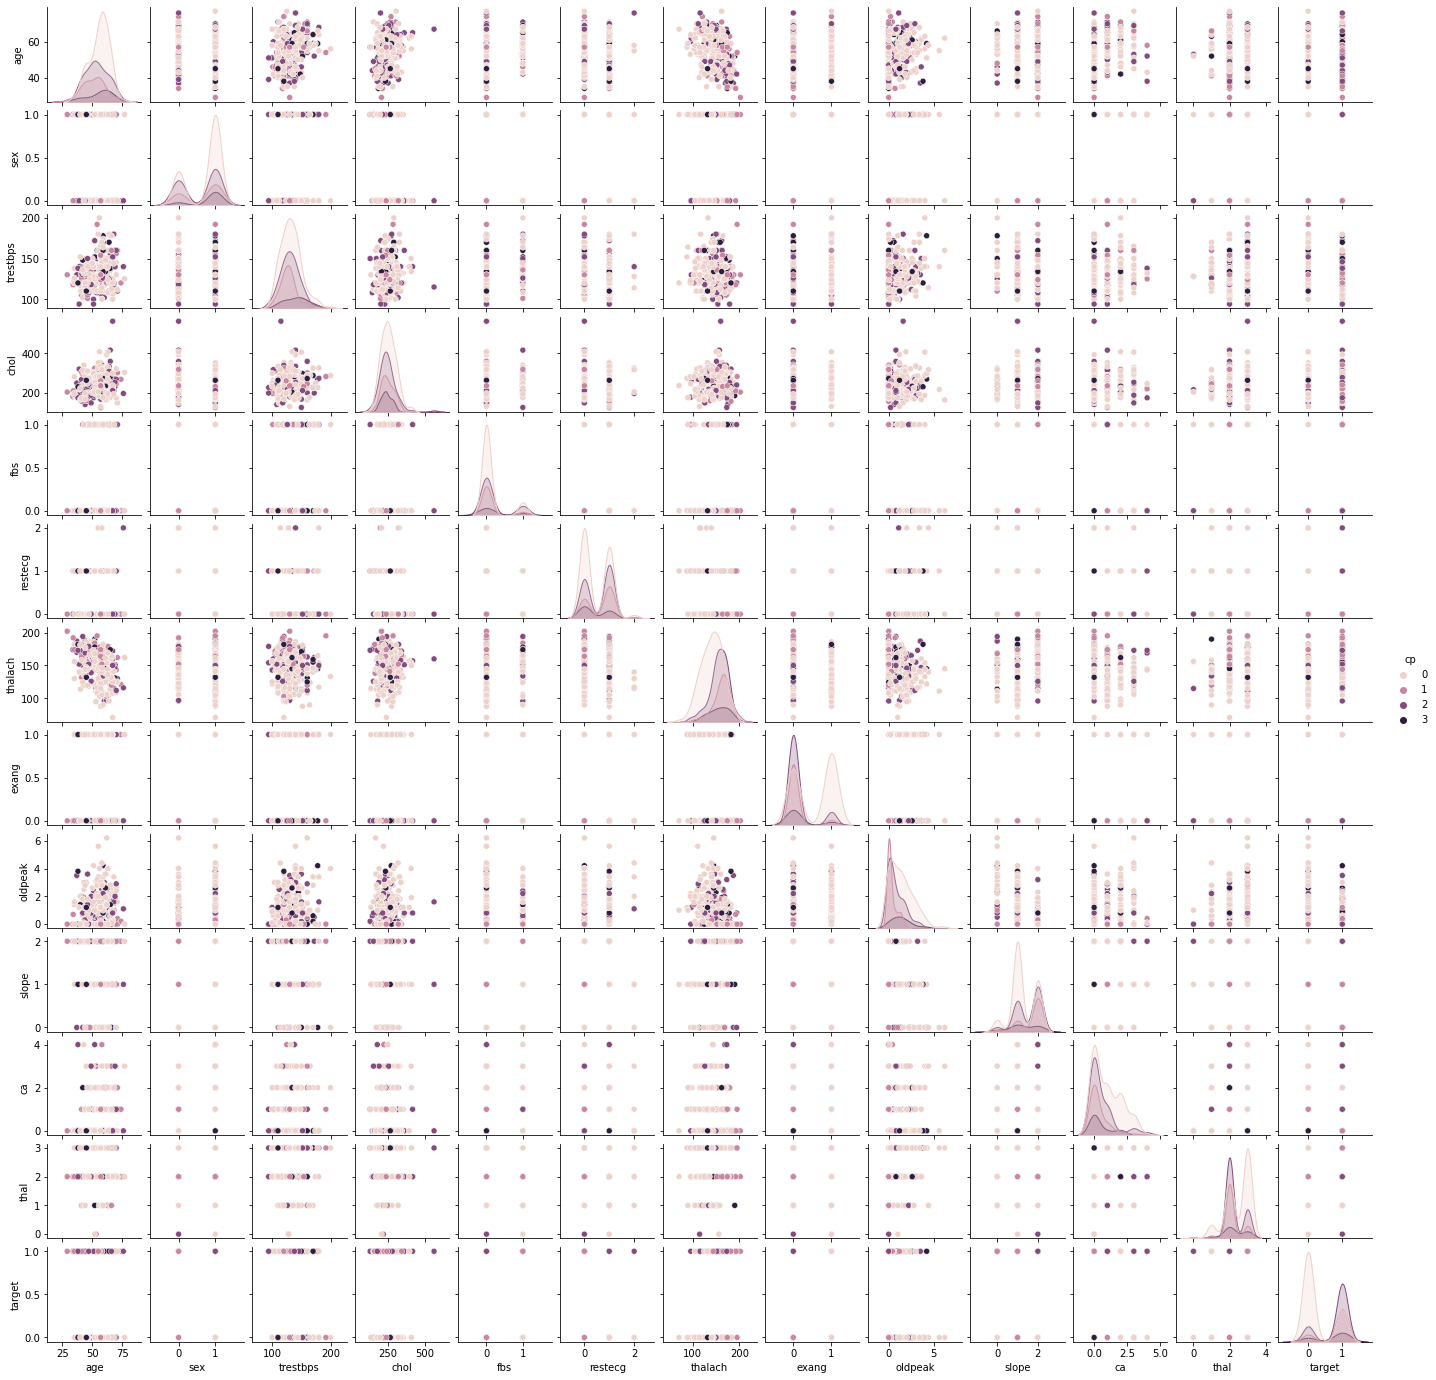

In [48]:
sns.pairplot(hdf2, hue='cp', height=1.5)

In [49]:
hdf2.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.585366,0.560976,1.371951,129.250000,242.640244,0.140244,0.591463,158.378049,0.140244,0.586585,1.591463,0.341463,2.121951


In [50]:
# for faster processing we take only mean columns as inpendendent vars
feature_mean=list(hdf2.columns[0:13])
feature_mean

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [51]:
#Perform logistic regression, predict the outcome for test data, and validate the results by using the confusion matrix.
corr=hdf2[feature_mean].corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090


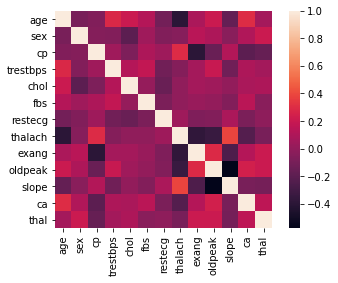

In [52]:
sns.heatmap(corr, cbar=True, square=True)
plt.show()

In [53]:
prediction_var=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']

In [54]:
train, test= train_test_split(hdf2, test_size=0.3, random_state=3)
print("train shape is:", train.shape)
print("test shape is:", test.shape)

train shape is: (211, 15)
test shape is: (91, 15)


In [55]:
train_x=train[prediction_var]
test_x=test[prediction_var]
train_y=train["target"]
test_y=test["target"]
print("train_x shape is:", train_x.shape)
print("train_y shape is:", train_y.shape)
print("test_x shape is:", test_x.shape)
print("test_y shape is:", test_y.shape)

train_x shape is: (211, 13)
train_y shape is: (211,)
test_x shape is: (91, 13)
test_y shape is: (91,)


In [56]:
model=LogisticRegression()
model.fit(train_x, train_y)
pv=model.predict(test_x)
print("Accuracy of the model is:",accuracy_score(pv, test_y))

Accuracy of the model is: 0.8571428571428571


In [57]:
confusion_matrix(pv,test_y)

array([[26,  3],
       [10, 52]], dtype=int64)

In [ ]:
Tableau link for the project: 

https://public.tableau.com/views/CPTarget/trestbpstarget?:language=en-US&:display_count=n&:origin=viz_share_link
